In [ ]:
# Introduction


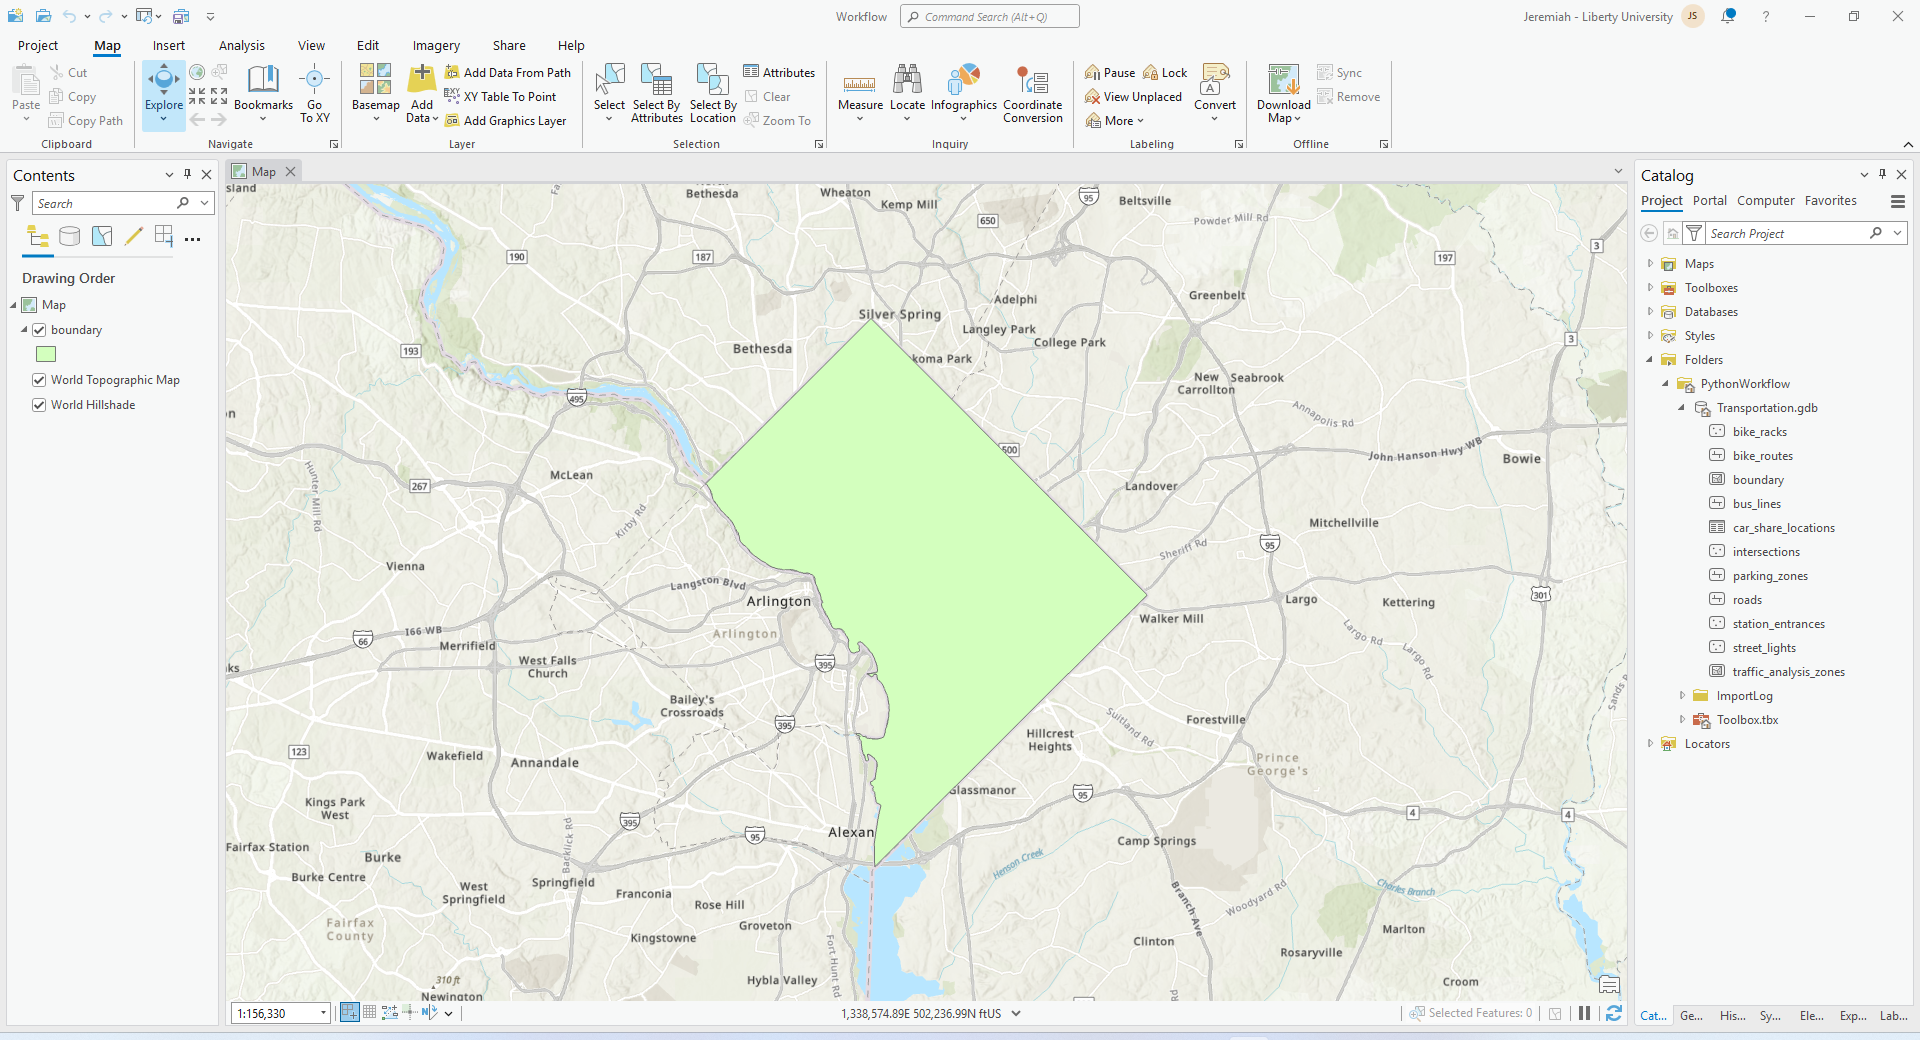
Image 1. Intial setup for the first tutorial "Automate a geoprocessing workflow with Python."

# workflow_project.py

# Author: Jeremiah Jon Shaw
# Date: 1 December 2024
# Purpose: This script reads all the feature classes in a geodatabase and copies them to a new feature dataset in
# a new geodatabase. Feature classes not already in the target coordinate system are projected.

# Import modules needed to run script.

import arcpy
import os

# Setting up the data location

mypath = r"C:\Users\Jon\ArcGIS Data\GEOG 650\Week 7\PythonWorkflow"  # Specifies the location of the data

# Setting up the variables

gbd = r"C:\Users\Jon\ArcGIS Data\GEOG 650\Week 7\PythonWorkflow\Transportation.gdb" #creates a variable that is equal to the geodatabase where they are stored
new_gdb = "Metro_Transport.gdb"
fds = "Metro_Network"

# Setting workspace requirements

arcpy.env.workspace = os.path.join(mypath, gbd) # Sets up the workspace
arcpy.env.overwriteOutput = True # This code makes it possible to run the script multiple times and just over write the previous data created
new_gdb_path = arcpy.CreateFileGDB_management(mypath, new_gdb) # This creates the new geodatabase and places it in the correct location.
arcpy.CreateFeatureDataset_management(new_gdb_path, fds, 2248) # This line manages the datasets in the new geodatabase

print(f"The geodatabase {new_gdb} has been created.") # This line is used to verify that the geodatabase was created without stepping out of the code.
print(f"The feature dataset {fds} has been created.") # This line is used to verify that the new dataset was created without stepping out of the code.

# Create variable for feature class list

fcs = arcpy.ListFeatureClasses()

# Create for loop to iterate feature class list to determine each spatial reference and either copy or project the correct spatial reference and copy to the new geodatabase

for fc in fcs:
    desc = arcpy.da.Describe(fc) # Creates a variable that hold the disction of the "fc" variable
    sr = desc["spatialReference"] # Creates a variable that hold the spatial reverence located in the "desc"
    new_fc = os.path.join(mypath, new_gdb, fds, fc) # creates a new veriable that set the old path then new path and the new dataset the feture class will be wrote
    if sr.factoryCode == 2248:  # This code checks the feature class' spatial reference against State Plane Maryland coordinate system, WKID of target coordinate system
        arcpy.CopyFeatures_management(fc, new_fc) # because the result was "true" this line copies the feature class to the new geodatabase
        print(f"The feature class {fc} has been copied.") # This line is used to verify that the feature class was created without stepping out of the code.
    else:
        arcpy.Project_management(fc, new_fc, 2248) # as the if stament returned "false" the code will now proceed to project a new spatial reference on the feature class
        print(f"The feature class {fc} has been projected.") # This line is used to verify that the feature class was reprojected without stepping out of the code.


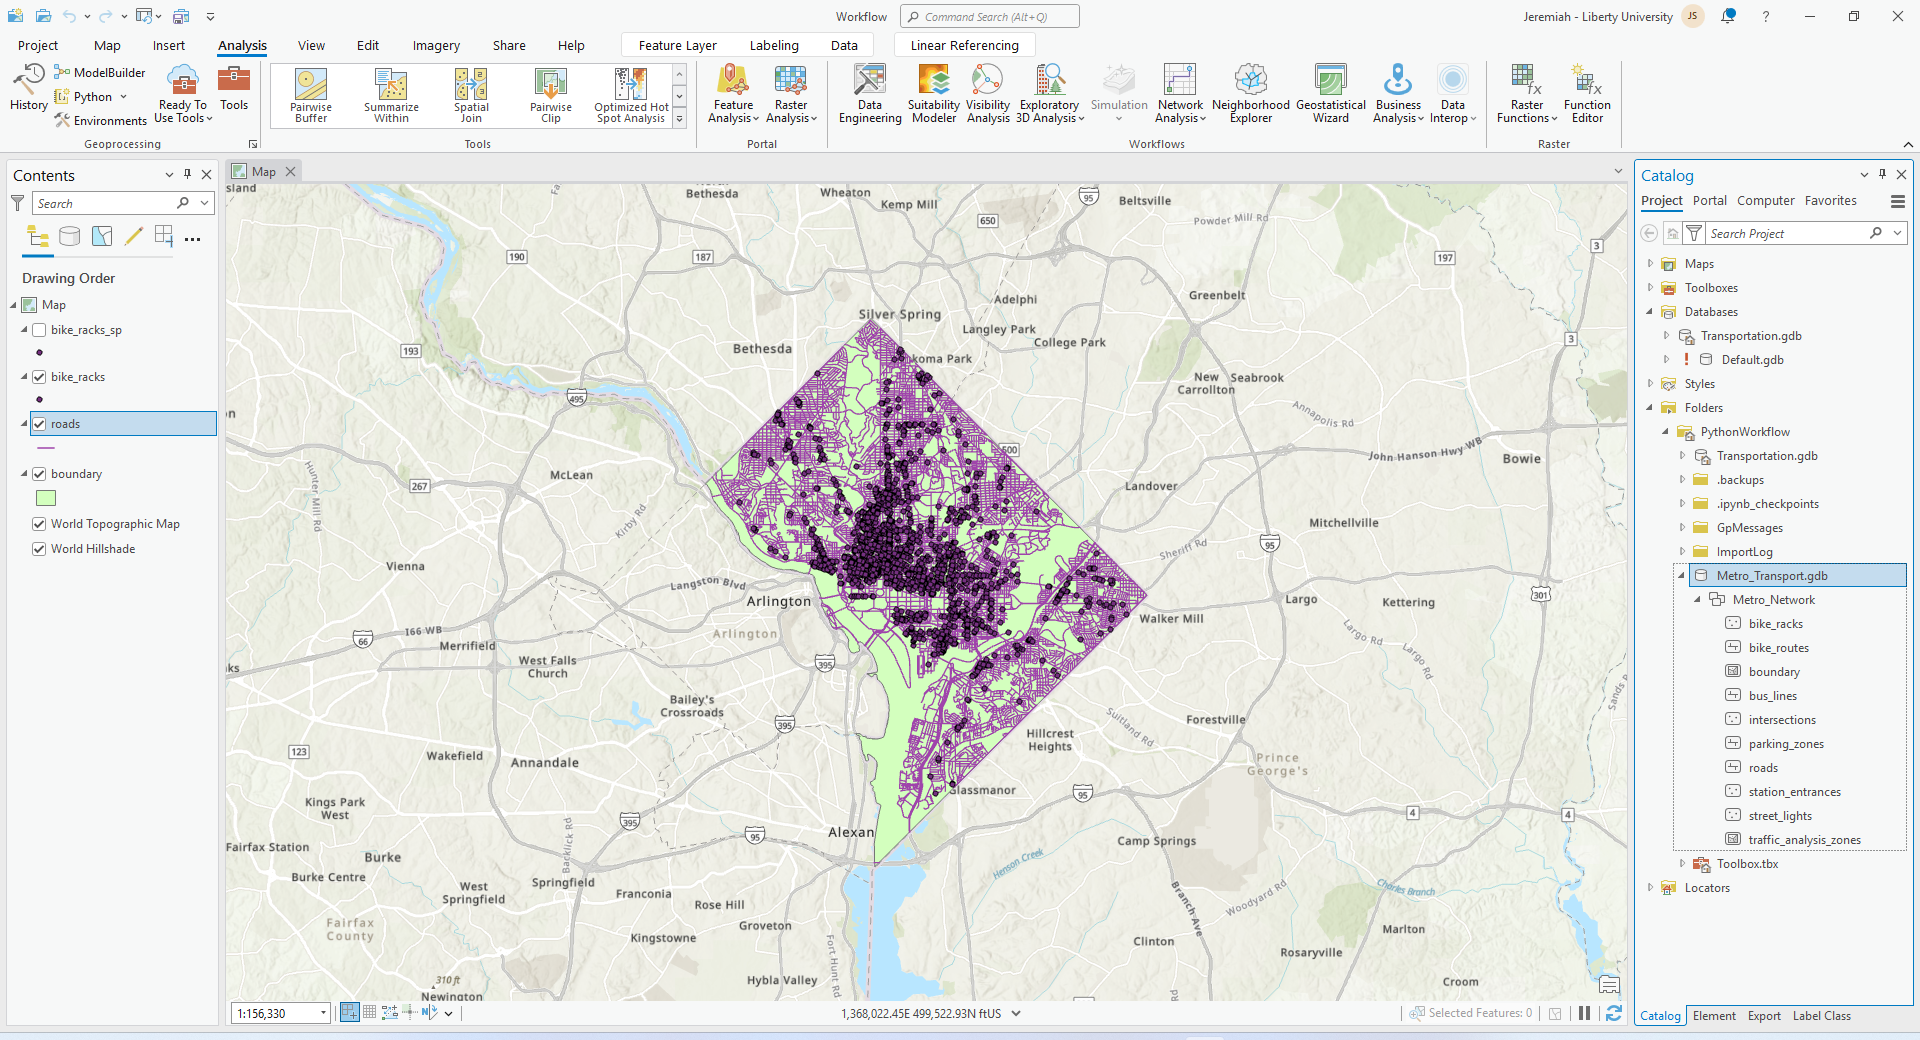
Image 2. completion of the first tutorial with the creation of a new database with the same spatial reference for all feature classes.

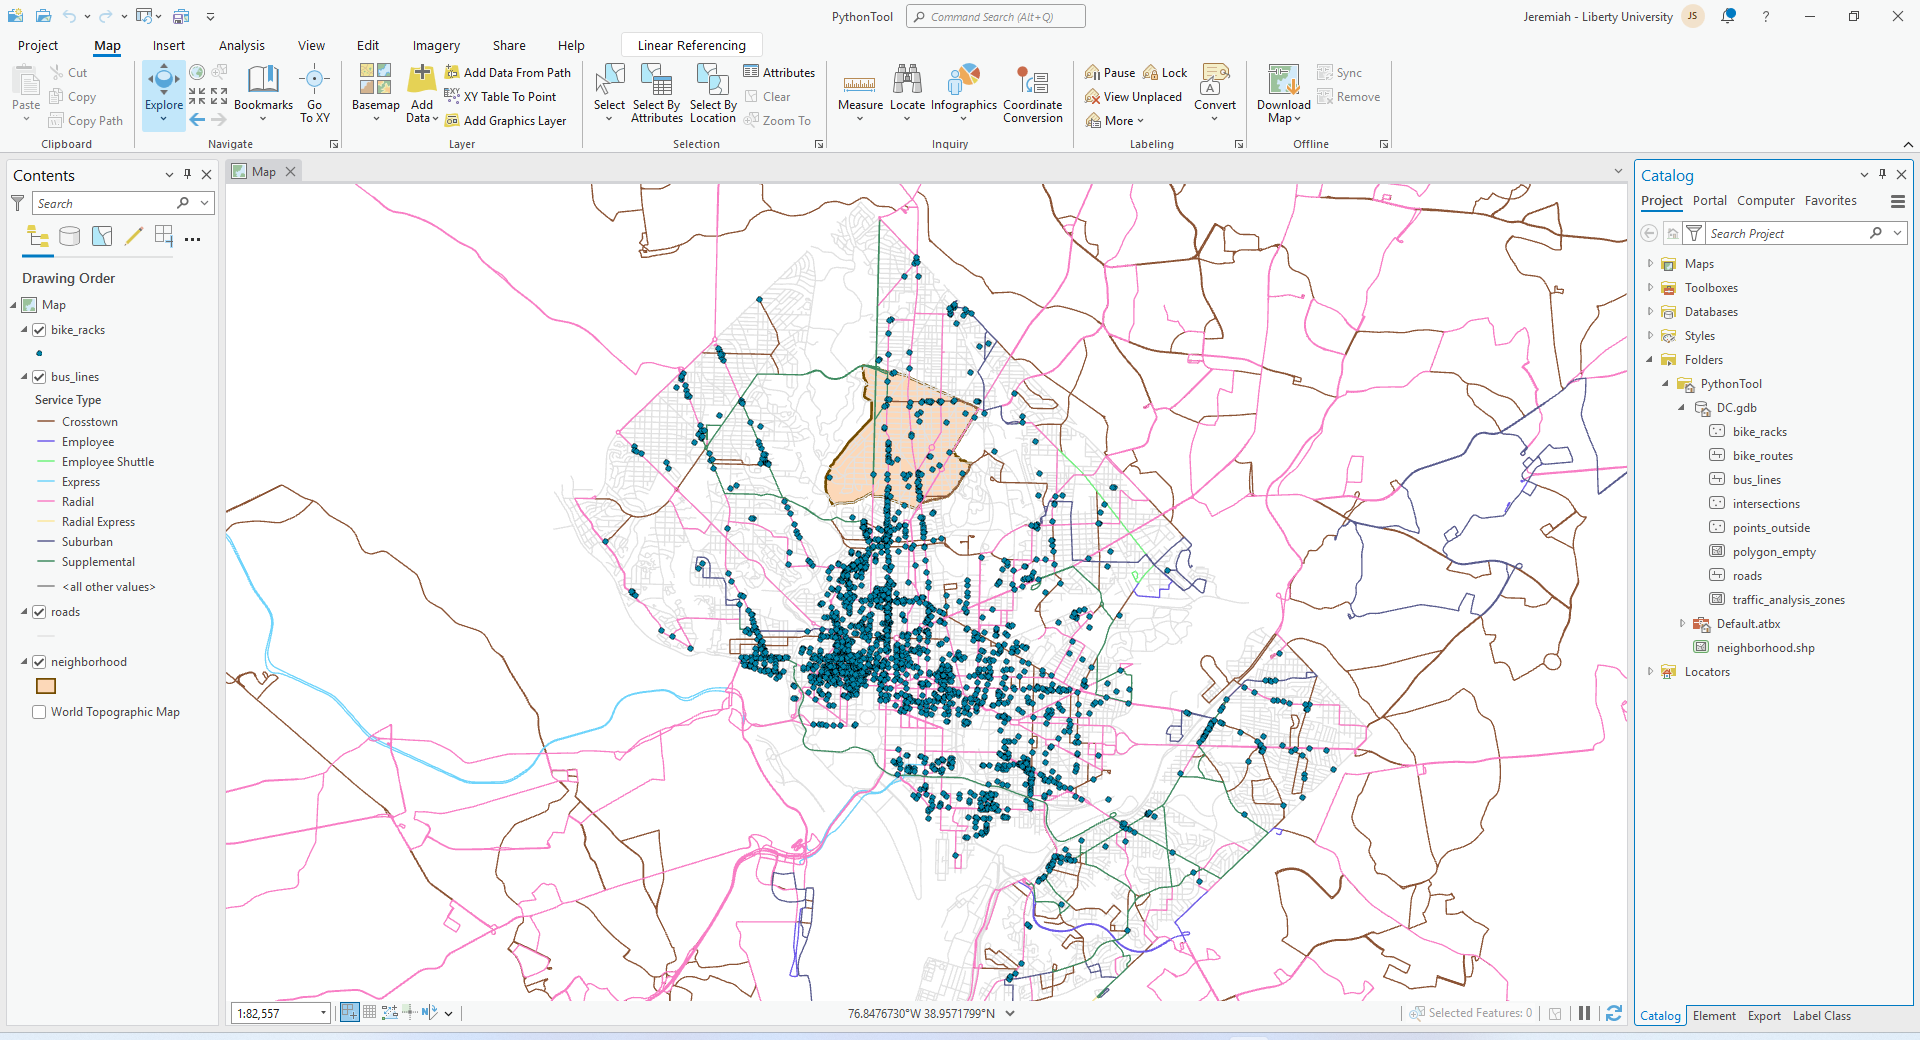
Image 3. inital map of "Create a Python script tool" 